In [3]:
def Function(dataframe, int_or_float, samplesize, col1_name, col2_name, magicnumber, variable_index, html):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import networkx as nx
    import re
    
    dataframe=pd.read_csv(dataframe, encoding='latin-1')
    
    def WeightCalculation(nodelist0, nodelist1):
        import re
        import math
        val1=float(re.findall("\d+", nodelist0)[0])
        val2=float(re.findall("\d+", nodelist1)[0])
        val3=float(re.findall("\d+", nodelist0)[1])
        val4=float(re.findall("\d+", nodelist1)[1])
        function= math.sqrt((val1-val2)**2+(val3-val4)**2)
        return function
    
    dataframe = dataframe.sample(samplesize).reset_index()
#     c3 = [(int(dataframe[col1_name][i]), int(dataframe[col2_name][i])) for i in range(len(dataframe[col1_name]))]

    if int_or_float==0:
        c3 = [(int(dataframe[col1_name][i]), int(dataframe[col2_name][i])) for i in range(len(dataframe[col1_name]))]
    
    if int_or_float==1:
        c3 = [(float(dataframe[col1_name][i]), float(dataframe[col2_name][i])) for i in range(len(dataframe[col1_name]))]

    
    F = nx.Graph()
    for i in range(len(c3)):
        F.add_node(str(c3[i]), weight=c3.count(c3[i]))

    nodelist2=list(F.nodes)

    MAGICNUMBER=magicnumber

    F = nx.Graph()
    for i in nodelist2:
        for j in nodelist2:
            try:
                w=WeightCalculation(i,j)
                if w<MAGICNUMBER:
                    F.add_edge(i,j, weight=w)
            except:
                continue
    nx.draw_networkx(F, with_labels=False, node_size=10, font_size=8)

    giant = max(nx.connected_component_subgraphs(F), key=len)
    center_nodes = nx.center(giant)
    print("+++++++++++++++++++CENTRE NODES+++++++++++++++++")
    print(center_nodes)
    print(len(center_nodes))

    bridges=list(nx.bridges(F))
    print("+++++++++++++++++++BRIDGES+++++++++++++++++")
    print(bridges, len(bridges))


    long=[]
    lat=[]
    
    variable = [center_nodes, bridges]
    
    if int_or_float==0:
        for bridge in variable[variable_index]:
            for subbridge in bridge:
                long.append(int(re.findall("[+-]?\d+", subbridge)[1]))
                lat.append(int(re.findall("[+-]?\d+", subbridge)[0]))

    if int_or_float==1:
        for bridge in variable[variable_index]:
            for subbridge in bridge:
                long.append(float(re.findall("[+-]?\d+\.\d+", subbridge)[1]))
                lat.append(float(re.findall("[+-]?\d+\.\d+", subbridge)[0]))

    import gmplot 

    latitude_list = long
    longitude_list = lat

    gmap3 = gmplot.GoogleMapPlotter(33, -101, 5) 

    # scatter method of map object  
    # scatter points on the google map 
    gmap3.scatter( latitude_list, longitude_list, '# FF0000', 
                                  size = 40, marker = False ) 

    # Plot method Draw a line in 
    # between given coordinates 
    gmap3.plot(latitude_list, longitude_list,  
               'cornflowerblue', edge_width = 2.5) 

    gmap3.heatmap(latitude_list, longitude_list)

    # Pass the absolute path 
    gmap3.draw(html) 

+++++++++++++++++++CENTRE NODES+++++++++++++++++
['(-81.00718, 34.959379999999996)', '(-81.00717, 35.503840000000004)']
2
+++++++++++++++++++BRIDGES+++++++++++++++++
[('(-81.00718, 34.959379999999996)', '(-81.00717, 35.503840000000004)'), ('(-80.05805, 26.85432)', '(-79.05805, 35.96354)'), ('(-76.31096, 37.051390000000005)', '(-77.31097, 38.58133)')] 3


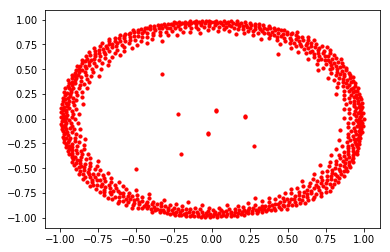

In [13]:
Function('test_node_data.csv', 1, 900, "F11", "F21", 2, 1, "success_map_testing.html")

In [15]:
from IPython.display import IFrame
IFrame("success_map_testing.html", width=700, height=350)